In [115]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [116]:
prev = pd.read_csv('/Users/khemendrasai/Desktop/Data science/case study/previous_application.csv')
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
prev.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [118]:
prev.info('AMT_APPLICATION')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [119]:
mprev = prev.iloc[:,[0,1,16]]
mprev.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_STATUS
0,2030495,271877,Approved
1,2802425,108129,Approved
2,2523466,122040,Approved
3,2819243,176158,Approved
4,1784265,202054,Refused
5,1383531,199383,Approved
6,2315218,175704,Canceled
7,1656711,296299,Canceled
8,2367563,342292,Canceled
9,2579447,334349,Canceled


In [122]:
mprev.isnull().sum()

SK_ID_PREV              0
SK_ID_CURR              0
NAME_CONTRACT_STATUS    0
dtype: int64

In [84]:
# downloading csv file
app = pd.read_csv('/Users/khemendrasai/Desktop/Data science/case study/application_data.csv')
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
app[['TARGET']].mean()

TARGET    0.080729
dtype: float64

In [96]:
app.info('TARGET')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                   

In [123]:
mapp = app.iloc[:,[0,1,2,3,4,5,7,8,9,10,18]]
mapp.isnull().sum()

SK_ID_CURR              0
TARGET                  0
NAME_CONTRACT_TYPE      0
CODE_GENDER             0
FLAG_OWN_CAR            0
FLAG_OWN_REALTY         0
AMT_INCOME_TOTAL        0
AMT_CREDIT              0
AMT_ANNUITY            12
AMT_GOODS_PRICE       278
DAYS_EMPLOYED           0
dtype: int64

In [124]:
merge = pd.merge(mapp, mprev, how='inner', on='SK_ID_CURR')
merge.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,SK_ID_PREV,NAME_CONTRACT_STATUS
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,-637,1038818,Approved
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,-1188,1810518,Approved
2,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,-1188,2636178,Approved
3,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,-1188,2396755,Approved
4,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,-225,1564014,Approved
5,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,-3039,2078043,Approved
6,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,-3039,2827850,Canceled
7,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,-3039,2190416,Approved
8,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,-3039,1489396,Approved
9,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,-3039,1020698,Approved


In [131]:
#LTV(which is loan to value ratio remians almost similar and can be used to fill the missing values in AMT_GOODS_PRICE)
#amortization which is a fraction of the credit amount is also similar and can be used to fill missing values in AMT_ANNUITY

mapp['LTV'] = mapp['AMT_CREDIT']/mapp['AMT_GOODS_PRICE']
mapp['amortization'] = mapp['AMT_ANNUITY']/mapp['AMT_CREDIT']
mapp['EMI'] = mapp['AMT_ANNUITY']/mapp['AMT_INCOME_TOTAL']
mapp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,LTV,amortization,EMI
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,-637,1.158397,0.060749,0.121978
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,-1188,1.145199,0.027598,0.132217
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,-225,1.000000,0.050000,0.100000
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,-3039,1.052803,0.094941,0.219900
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,-3038,1.000000,0.042623,0.179963


In [132]:
mapp['EMI'].describe()

count    307511.000000
mean          0.180929
std           0.094573
min           0.000224
25%           0.114782
50%           0.162833
75%           0.229067
max           1.875965
Name: EMI, dtype: float64

In [133]:
mapp['LTV'].describe()
#LTV std is very low and is almost similar for up to 75% of values. Therefore, mean LTV can be used to fill the missing values in AMT_GOODS_PRICE 

count    307511.000000
mean          1.122785
std           0.124186
min           0.150000
25%           1.000000
50%           1.118800
75%           1.198000
max           6.000000
Name: LTV, dtype: float64

In [134]:
mapp.loc[np.isnan(mapp['AMT_GOODS_PRICE']), ['AMT_GOODS_PRICE']] = mapp['AMT_CREDIT']*1.122995
mapp.isnull().sum()

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
FLAG_OWN_REALTY       0
AMT_INCOME_TOTAL      0
AMT_CREDIT            0
AMT_ANNUITY           0
AMT_GOODS_PRICE       0
DAYS_EMPLOYED         0
LTV                   0
amortization          0
EMI                   0
dtype: int64

In [135]:
mapp['amortization'].describe()
#std of amortization also is very small and hence mean can be used for filling the missing values in AMT_ANNUITY

count    307511.000000
mean          0.053695
std           0.022481
min           0.022073
25%           0.036900
50%           0.050000
75%           0.064043
max           0.124430
Name: amortization, dtype: float64

In [136]:
mapp.loc[np.isnan(mapp['AMT_ANNUITY']), ['AMT_ANNUITY']] = mapp['AMT_CREDIT']*0.053695
mapp.isnull().sum()

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
FLAG_OWN_REALTY       0
AMT_INCOME_TOTAL      0
AMT_CREDIT            0
AMT_ANNUITY           0
AMT_GOODS_PRICE       0
DAYS_EMPLOYED         0
LTV                   0
amortization          0
EMI                   0
dtype: int64

In [137]:
oth = mapp.loc[app.TARGET==0]
oth.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,LTV,amortization,EMI
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,-1188,1.145199,0.027598,0.132217
2,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,-225,1.000000,0.050000,0.100000
3,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,-3039,1.052803,0.094941,0.219900
4,100007,0,Cash loans,M,N,Y,121500.0,513000.0,21865.5,513000.0,-3038,1.000000,0.042623,0.179963
5,100008,0,Cash loans,M,N,Y,99000.0,490495.5,27517.5,454500.0,-1588,1.079198,0.056101,0.277955


In [138]:
mapp.isnull().sum().head(20)

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
FLAG_OWN_REALTY       0
AMT_INCOME_TOTAL      0
AMT_CREDIT            0
AMT_ANNUITY           0
AMT_GOODS_PRICE       0
DAYS_EMPLOYED         0
LTV                   0
amortization          0
EMI                   0
dtype: int64

In [139]:
mapp.describe()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,LTV,amortization,EMI
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,1.687979e+05,5.990260e+05,27108.701755,5.381934e+05,63815.045904,1.122785,0.053695,0.180929
std,102790.175348,0.272419,2.371231e+05,4.024908e+05,14493.942618,3.693964e+05,141275.766519,0.124186,0.022481,0.094573
min,100002.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,-17912.000000,0.150000,0.022073,0.000224
25%,189145.500000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,-2760.000000,1.000000,0.036900,0.114782
50%,278202.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,-1213.000000,1.118800,0.050000,0.162833
75%,367142.500000,0.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,-289.000000,1.198000,0.064043,0.229067
max,456255.000000,1.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,365243.000000,6.000000,0.124430,1.875965


In [140]:
d = mapp.loc[app.TARGET==1]
d.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,LTV,amortization,EMI
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,-637,1.158397,0.060749,0.121978
26,100031,1,Cash loans,F,N,Y,112500.0,979992.0,27076.5,702000.0,-2628,1.396000,0.027629,0.240680
40,100047,1,Cash loans,M,N,Y,202500.0,1193580.0,35028.0,855000.0,-1262,1.396000,0.029347,0.172978
42,100049,1,Cash loans,F,N,N,135000.0,288873.0,16258.5,238500.0,-3597,1.211208,0.056283,0.120433
81,100096,1,Cash loans,F,N,Y,81000.0,252000.0,14593.5,252000.0,365243,1.000000,0.057911,0.180167


In [141]:
dmerge = merge.loc[merge.TARGET==1]
dmerge.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,SK_ID_PREV,NAME_CONTRACT_STATUS
0,100002,1,Cash loans,M,N,Y,202500.0,406597.5,24700.5,351000.0,-637,1038818,Approved
161,100047,1,Cash loans,M,N,Y,202500.0,1193580.0,35028.0,855000.0,-1262,1472630,Approved
162,100047,1,Cash loans,M,N,Y,202500.0,1193580.0,35028.0,855000.0,-1262,2426800,Approved
163,100047,1,Cash loans,M,N,Y,202500.0,1193580.0,35028.0,855000.0,-1262,1021215,Refused
164,100047,1,Cash loans,M,N,Y,202500.0,1193580.0,35028.0,855000.0,-1262,1035321,Approved


In [142]:
othmerge=merge.loc[merge.TARGET==0]
othmerge.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,SK_ID_PREV,NAME_CONTRACT_STATUS
1,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,-1188,1810518,Approved
2,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,-1188,2636178,Approved
3,100003,0,Cash loans,F,N,N,270000.0,1293502.5,35698.5,1129500.0,-1188,2396755,Approved
4,100004,0,Revolving loans,M,Y,Y,67500.0,135000.0,6750.0,135000.0,-225,1564014,Approved
5,100006,0,Cash loans,F,N,Y,135000.0,312682.5,29686.5,297000.0,-3039,2078043,Approved


In [143]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24825 entries, 0 to 307509
Data columns (total 14 columns):
SK_ID_CURR            24825 non-null int64
TARGET                24825 non-null int64
NAME_CONTRACT_TYPE    24825 non-null object
CODE_GENDER           24825 non-null object
FLAG_OWN_CAR          24825 non-null object
FLAG_OWN_REALTY       24825 non-null object
AMT_INCOME_TOTAL      24825 non-null float64
AMT_CREDIT            24825 non-null float64
AMT_ANNUITY           24825 non-null float64
AMT_GOODS_PRICE       24825 non-null float64
DAYS_EMPLOYED         24825 non-null int64
LTV                   24825 non-null float64
amortization          24825 non-null float64
EMI                   24825 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 2.8+ MB


In [144]:
oth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282686 entries, 1 to 307510
Data columns (total 14 columns):
SK_ID_CURR            282686 non-null int64
TARGET                282686 non-null int64
NAME_CONTRACT_TYPE    282686 non-null object
CODE_GENDER           282686 non-null object
FLAG_OWN_CAR          282686 non-null object
FLAG_OWN_REALTY       282686 non-null object
AMT_INCOME_TOTAL      282686 non-null float64
AMT_CREDIT            282686 non-null float64
AMT_ANNUITY           282686 non-null float64
AMT_GOODS_PRICE       282686 non-null float64
DAYS_EMPLOYED         282686 non-null int64
LTV                   282686 non-null float64
amortization          282686 non-null float64
EMI                   282686 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 32.4+ MB


In [26]:
d.describe()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,LTV,amortization,EMI
count,24825.000000,24825.0,2.482500e+04,2.482500e+04,24825.000000,2.482500e+04,24825.000000,24825.000000,24825.000000,24825.000000
mean,277449.167936,1.0,1.656118e+05,5.577785e+05,26481.744290,4.887959e+05,42394.675448,1.151834,0.054659,0.185482
std,102383.123458,0.0,7.466770e+05,3.464332e+05,12450.676999,3.116020e+05,119484.634253,0.134411,0.020577,0.094497
min,100002.000000,1.0,2.565000e+04,4.500000e+04,2722.500000,4.500000e+04,-16069.000000,0.333333,0.022077,0.000224
25%,189555.000000,1.0,1.125000e+05,2.844000e+05,17361.000000,2.385000e+05,-2156.000000,1.000000,0.039656,0.120000
50%,276291.000000,1.0,1.350000e+05,4.975200e+05,25263.000000,4.500000e+05,-1034.000000,1.145200,0.050000,0.169294
75%,366050.000000,1.0,2.025000e+05,7.333155e+05,32976.000000,6.750000e+05,-379.000000,1.211202,0.066827,0.233640
max,456254.000000,1.0,1.170000e+08,4.027680e+06,149211.000000,3.600000e+06,365243.000000,2.666667,0.124428,1.875965


In [145]:
oth.nunique().sort_values()

TARGET                     1
NAME_CONTRACT_TYPE         2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CODE_GENDER                3
AMT_GOODS_PRICE          971
AMT_INCOME_TOTAL        2450
LTV                     3010
AMT_CREDIT              5488
DAYS_EMPLOYED          12494
AMT_ANNUITY            13533
amortization           38144
EMI                    84765
SK_ID_CURR            282686
dtype: int64

In [147]:
d.nunique().sort_values()

TARGET                    1
NAME_CONTRACT_TYPE        2
CODE_GENDER               2
FLAG_OWN_CAR              2
FLAG_OWN_REALTY           2
AMT_INCOME_TOTAL        416
AMT_GOODS_PRICE         434
LTV                    1141
AMT_CREDIT             2504
DAYS_EMPLOYED          5400
AMT_ANNUITY            6119
amortization           8863
EMI                   15753
SK_ID_CURR            24825
dtype: int64

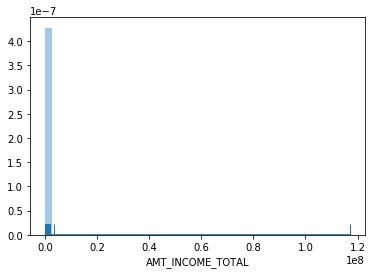

In [160]:
sns.distplot(d['AMT_INCOME_TOTAL'],rug=True)
plt.show()

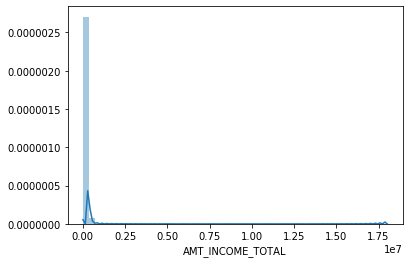

In [159]:
sns.distplot(oth['AMT_INCOME_TOTAL'])
plt.show()

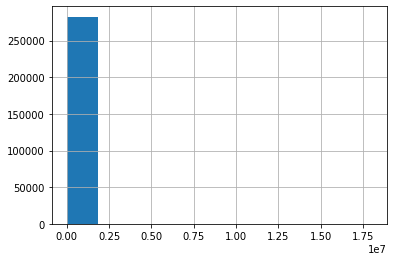

In [161]:
oth['AMT_INCOME_TOTAL'].hist()

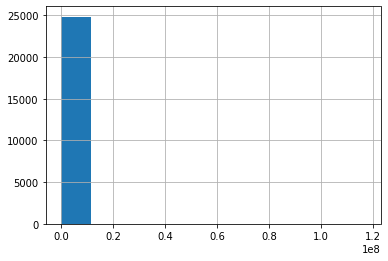

In [162]:
d['AMT_INCOME_TOTAL'].hist()
# the value of amount income total is almost 0 according to the graph in both the targets 

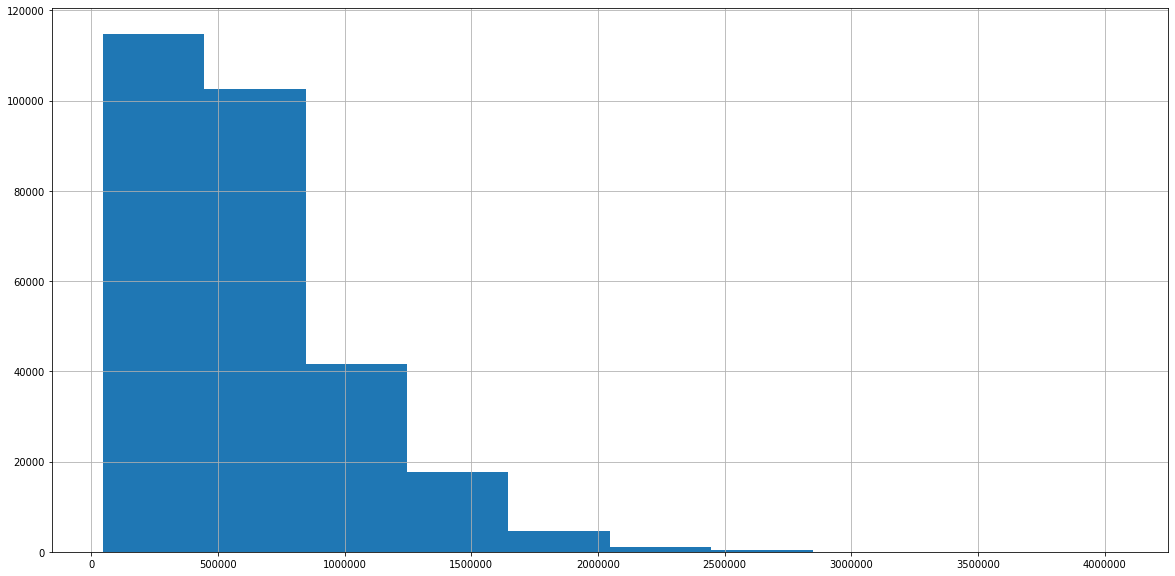

In [163]:
plt.figure(figsize=(20,10))
oth['AMT_CREDIT'].hist()
# target 0 The amount credit was stable and then decreased drastically as the loan amount and most of the people have a amount credit for 50,000 to 1 lac 


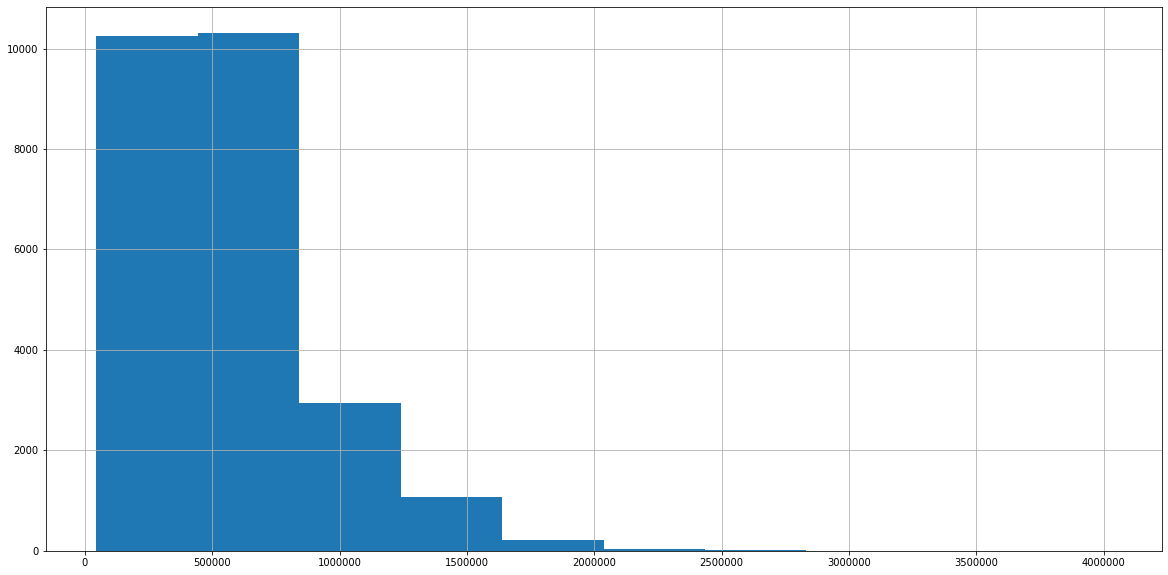

In [42]:
plt.figure(figsize=(20,10))
d['AMT_CREDIT'].hist()
# target 1 The amount credit was stable and then decreased drastically here there was slight increase first but here also the amount credit is mostly inbetween 0 to 1 lac 

([array([5.8000e+01, 8.8788e+04, 5.5490e+03, 3.0000e+00, 4.0000e+00,
         0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
  array([1.13000e+02, 1.76721e+05, 1.14270e+04, 7.00000e+00, 6.00000e+00,
         1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00])],
 array([0.15 , 0.735, 1.32 , 1.905, 2.49 , 3.075, 3.66 , 4.245, 4.83 ,
        5.415, 6.   ]),
 <a list of 2 Lists of Patches objects>)

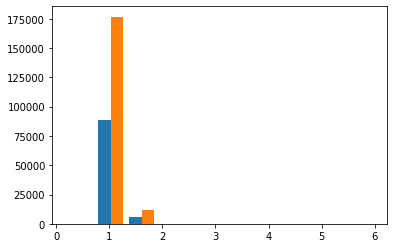

In [164]:
x1=list(oth[oth['CODE_GENDER']=='M']['LTV'])
x2=list(oth[oth['CODE_GENDER']=='F']['LTV'])
plt.hist([x1,x2])
# target 0 women have more ltv than men both the targets got same result and the LTV is mostly in 1 both the genders 

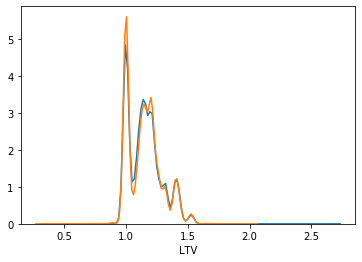

In [165]:
sex=['M','F']
for i in sex:
    subset=d[d['CODE_GENDER']==i]
    sns.distplot(subset['LTV'],hist=False)
    # target 1 women have more ltv than men 
    # here the LTV is between 1 to 1.5
    

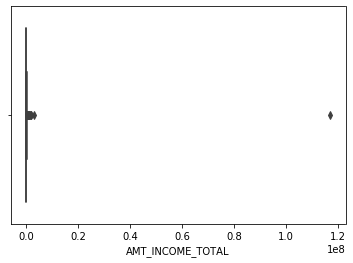

In [166]:
sns.boxplot(d['AMT_INCOME_TOTAL'])
# this is outlier there is outlier at 12 and the maximum is mostly in 0 so if you remove the outlier you can get the value which is mostly near 0


([array([156357.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,  39972.]),
  array([73945.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0., 12412.])],
 array([-17912. ,  20403.5,  58719. ,  97034.5, 135350. , 173665.5,
        211981. , 250296.5, 288612. , 326927.5, 365243. ]),
 <a list of 2 Lists of Patches objects>)

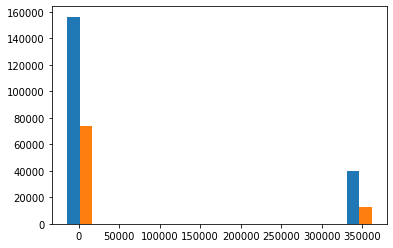

In [167]:
x1=list(oth[oth['FLAG_OWN_REALTY']=='Y']['DAYS_EMPLOYED'])
x2=list(oth[oth['FLAG_OWN_REALTY']=='N']['DAYS_EMPLOYED'])
plt.hist([x1,x2])
# the people owned a realty have been employed more than the who didn't own realty this for target 0 the value is higher for zero and there was peak at 35000

([array([14725.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,  2258.]),
  array([7110.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          732.])],
 array([-16069. ,  22062.2,  60193.4,  98324.6, 136455.8, 174587. ,
        212718.2, 250849.4, 288980.6, 327111.8, 365243. ]),
 <a list of 2 Lists of Patches objects>)

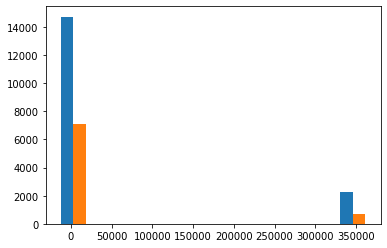

In [168]:
x1=list(d[d['FLAG_OWN_REALTY']=='Y']['DAYS_EMPLOYED'])
x2=list(d[d['FLAG_OWN_REALTY']=='N']['DAYS_EMPLOYED'])
plt.hist([x1,x2])
# the people owned a realty have been employed more than the who didn't own realty this for target 1 
# both the target flags are similar

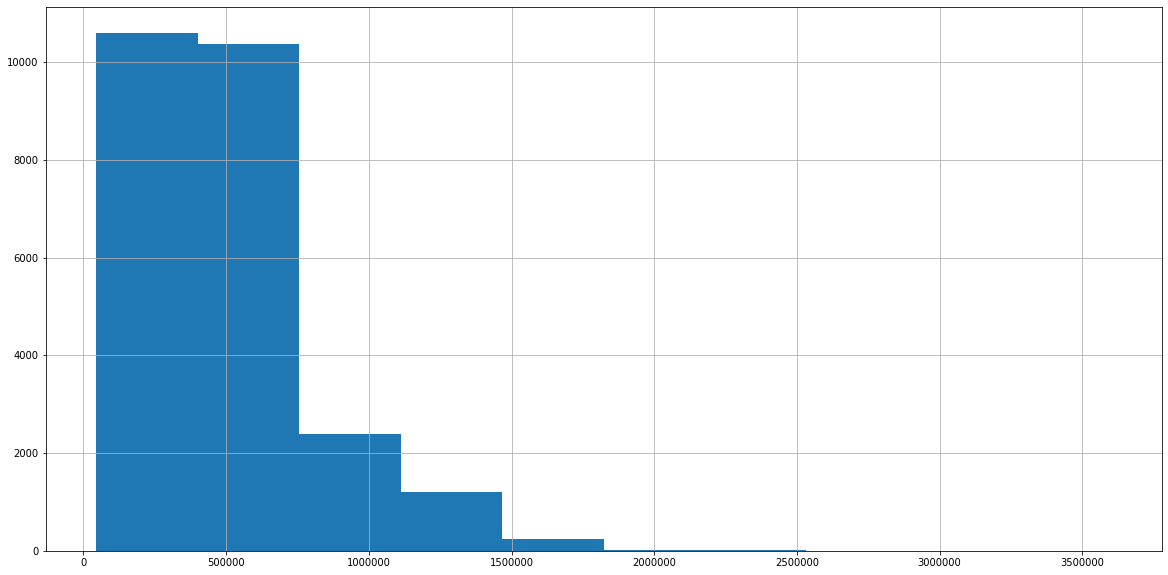

In [169]:
plt.figure(figsize=(20,10))
d['AMT_GOODS_PRICE'].hist()
# this is decreasing plot which is made for target 1 the amount of the goods proice is mostly in 0 to 1.5 lac 

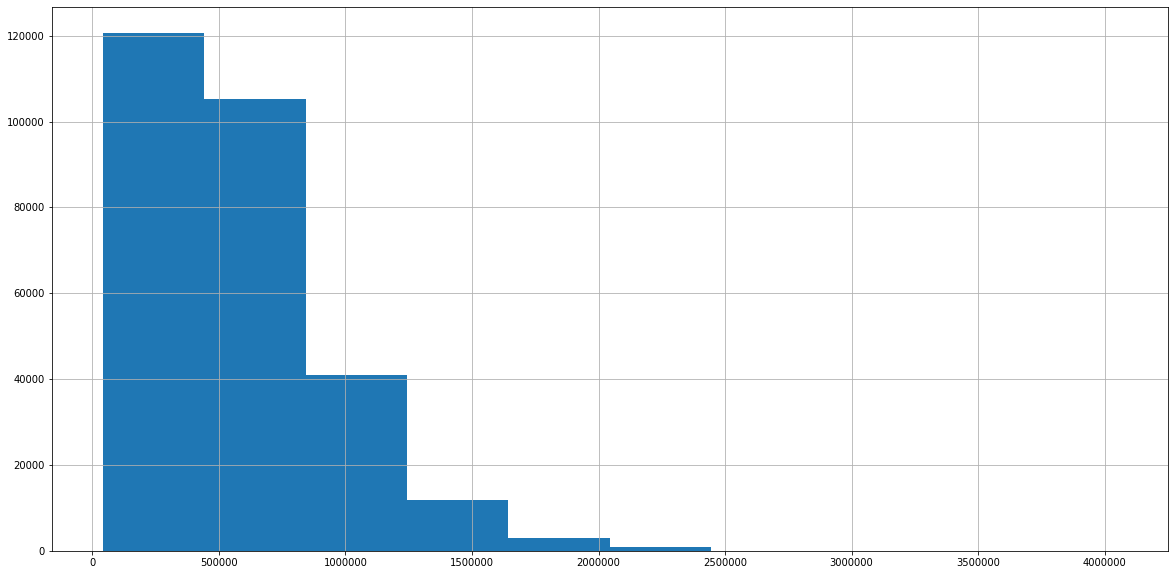

In [170]:
plt.figure(figsize=(20,10))
oth['AMT_GOODS_PRICE'].hist()
# this is decreasing plot which is made for target 0
# the plots are similar for both the targets 
# this is decreasing plot which is made for target 1 the amount of the goods proice is mostly in 0 to 2.0 lac 

In [171]:
#Data Imbalance  for target1
100*d['CODE_GENDER'].value_counts(normalize=True)

F    57.079557
M    42.920443
Name: CODE_GENDER, dtype: float64

In [51]:
#Data Imbalance  for target0
100*oth['CODE_GENDER'].value_counts(normalize=True)

F      66.603228
M      33.395357
XNA     0.001415
Name: CODE_GENDER, dtype: float64

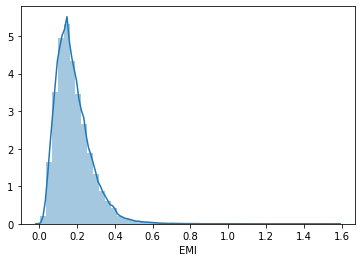

In [148]:
sns.distplot(oth['EMI'])
plt.show()

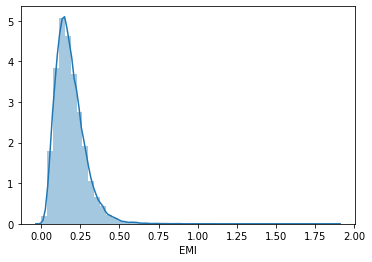

In [149]:
sns.distplot(d['EMI'])
plt.show()

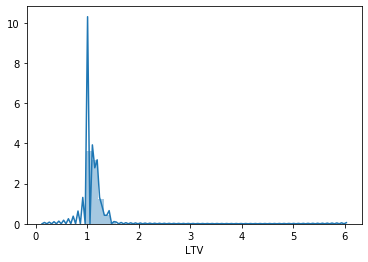

In [31]:
sns.distplot(oth['LTV'])
plt.show()

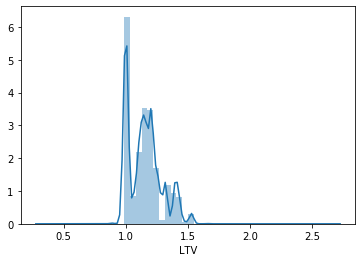

In [150]:
sns.distplot(d['LTV'])
plt.show()

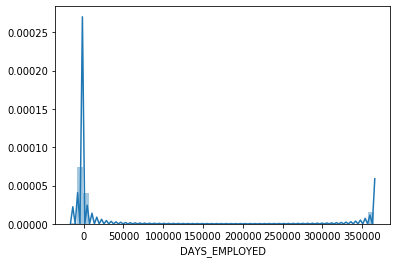

In [157]:
sns.distplot(d['DAYS_EMPLOYED'])
plt.show()

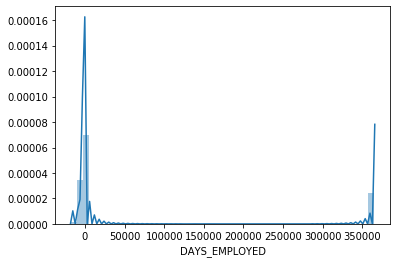

In [158]:
sns.distplot(oth['DAYS_EMPLOYED'])
plt.show()

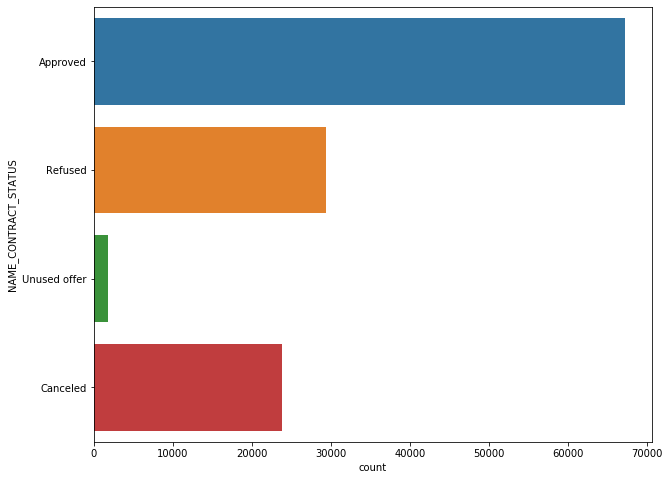

In [151]:
plt.figure(figsize=(10, 8))
sns.countplot(y="NAME_CONTRACT_STATUS", data=dmerge)
plt.show()

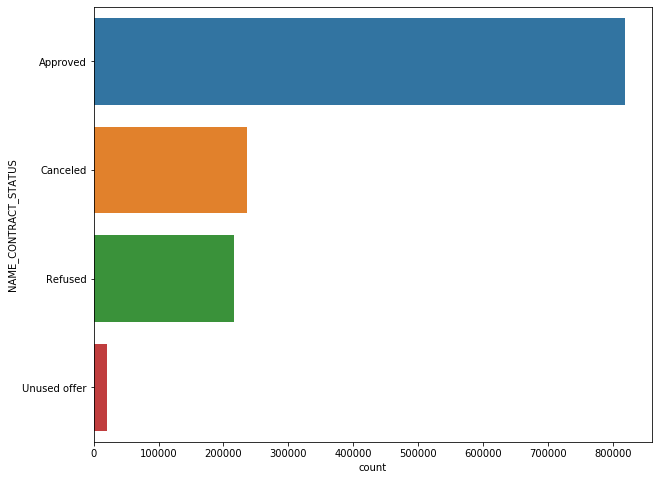

In [152]:
plt.figure(figsize=(10, 8))
sns.countplot(y="NAME_CONTRACT_STATUS", data=othmerge)
plt.show()

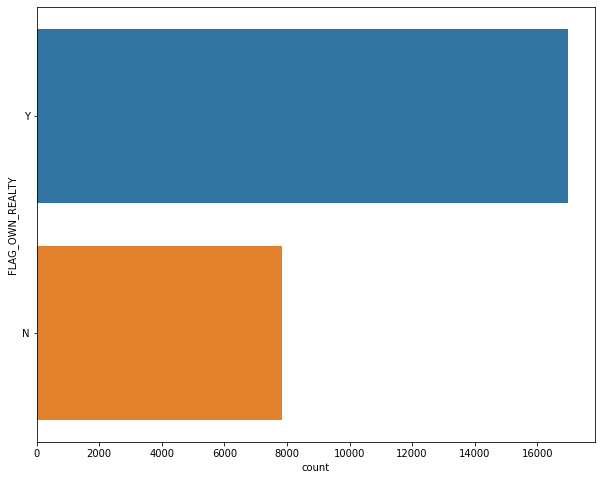

In [153]:
plt.figure(figsize=(10, 8))
sns.countplot(y="FLAG_OWN_REALTY", data=d)
plt.show()

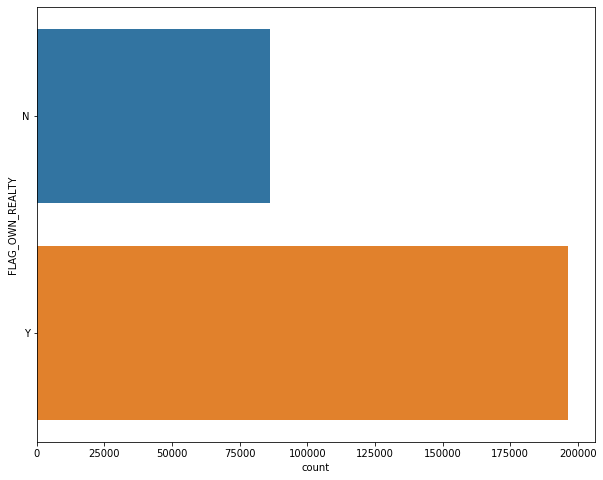

In [154]:
plt.figure(figsize=(10, 8))
sns.countplot(y="FLAG_OWN_REALTY", data=oth)
plt.show()

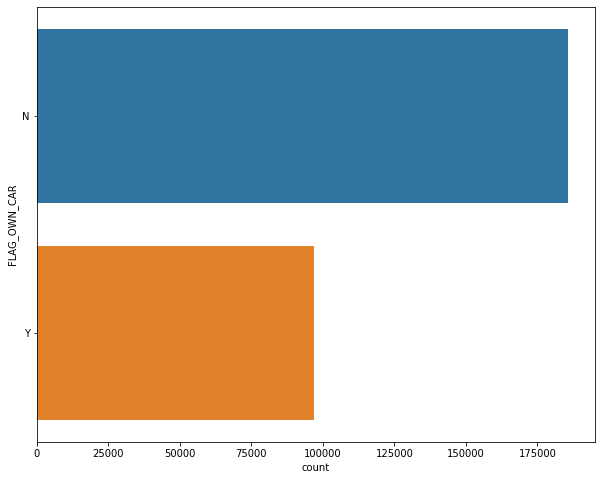

In [155]:
plt.figure(figsize=(10, 8))
sns.countplot(y="FLAG_OWN_CAR", data=oth)
plt.show()

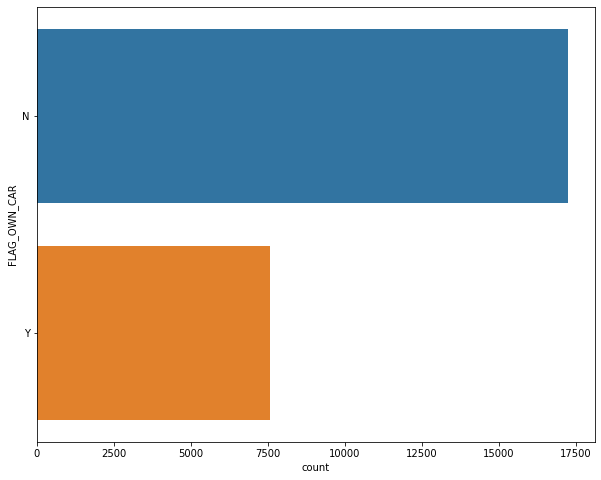

In [156]:
plt.figure(figsize=(10, 8))
sns.countplot(y="FLAG_OWN_CAR", data=d)
plt.show()

In [68]:
#Bivariate Analysis for target1
bit1=d[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED']]
bit1.head()

#grouping the numerical data for target0

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED
0,202500.0,406597.5,24700.5,351000.0,-637
26,112500.0,979992.0,27076.5,702000.0,-2628
40,202500.0,1193580.0,35028.0,855000.0,-1262
42,135000.0,288873.0,16258.5,238500.0,-3597
81,81000.0,252000.0,14593.5,252000.0,365243


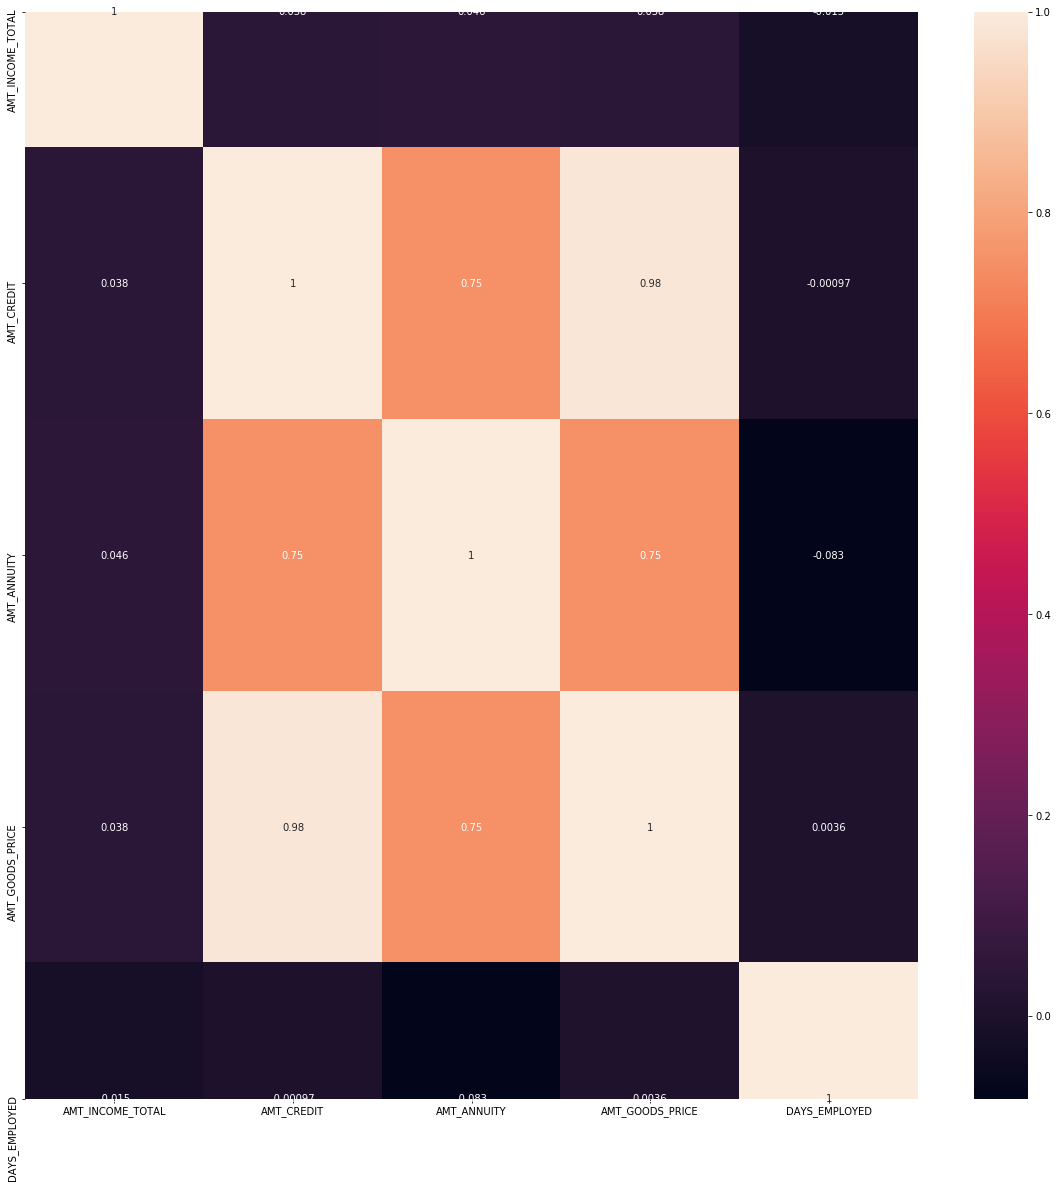

In [69]:
corr_matrix1=bit1.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix1,annot=True)
# plot for correlation for target0

In [70]:
corrt1= corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape),k=1).astype(np.bool))
#removing the correlation of same values if it multiple  for target1 and replacing with NAN

In [71]:
corrt1=corrt1.unstack().reset_index()
#resetting the index for target0

In [83]:
corrt1.columns=['Var1', 'Var2','Correlation']
corrt1.head()
#changing the column names for taget1

,Var1,Var2,Correlation
5,AMT_CREDIT,AMT_INCOME_TOTAL,0.038131
10,AMT_ANNUITY,AMT_INCOME_TOTAL,0.046421
11,AMT_ANNUITY,AMT_CREDIT,0.752195
15,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.037631
16,AMT_GOODS_PRICE,AMT_CREDIT,0.983089


In [73]:
corrt1.dropna(subset=['Correlation'], inplace=True)
# removing the NAN values for target1

In [74]:
corrt1.Correlation=abs(corrt1.Correlation)
corrt1.sort_values('Correlation', ascending=False)
#sorted values of correlation target1 where the values are sorted in descending order

,Var1,Var2,Correlation
16,AMT_GOODS_PRICE,AMT_CREDIT,0.983089
17,AMT_GOODS_PRICE,AMT_ANNUITY,0.752857
11,AMT_ANNUITY,AMT_CREDIT,0.752195
22,DAYS_EMPLOYED,AMT_ANNUITY,0.082552
10,AMT_ANNUITY,AMT_INCOME_TOTAL,0.046421
5,AMT_CREDIT,AMT_INCOME_TOTAL,0.038131
15,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.037631
20,DAYS_EMPLOYED,AMT_INCOME_TOTAL,0.014979
23,DAYS_EMPLOYED,AMT_GOODS_PRICE,0.003626
21,DAYS_EMPLOYED,AMT_CREDIT,0.000968


In [76]:
#Bivariant analysis for target 0
bit0=oth[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED']]
bit0.head()
#grouping the numerical data for target0

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED
1,270000.0,1293502.5,35698.5,1129500.0,-1188
2,67500.0,135000.0,6750.0,135000.0,-225
3,135000.0,312682.5,29686.5,297000.0,-3039
4,121500.0,513000.0,21865.5,513000.0,-3038
5,99000.0,490495.5,27517.5,454500.0,-1588


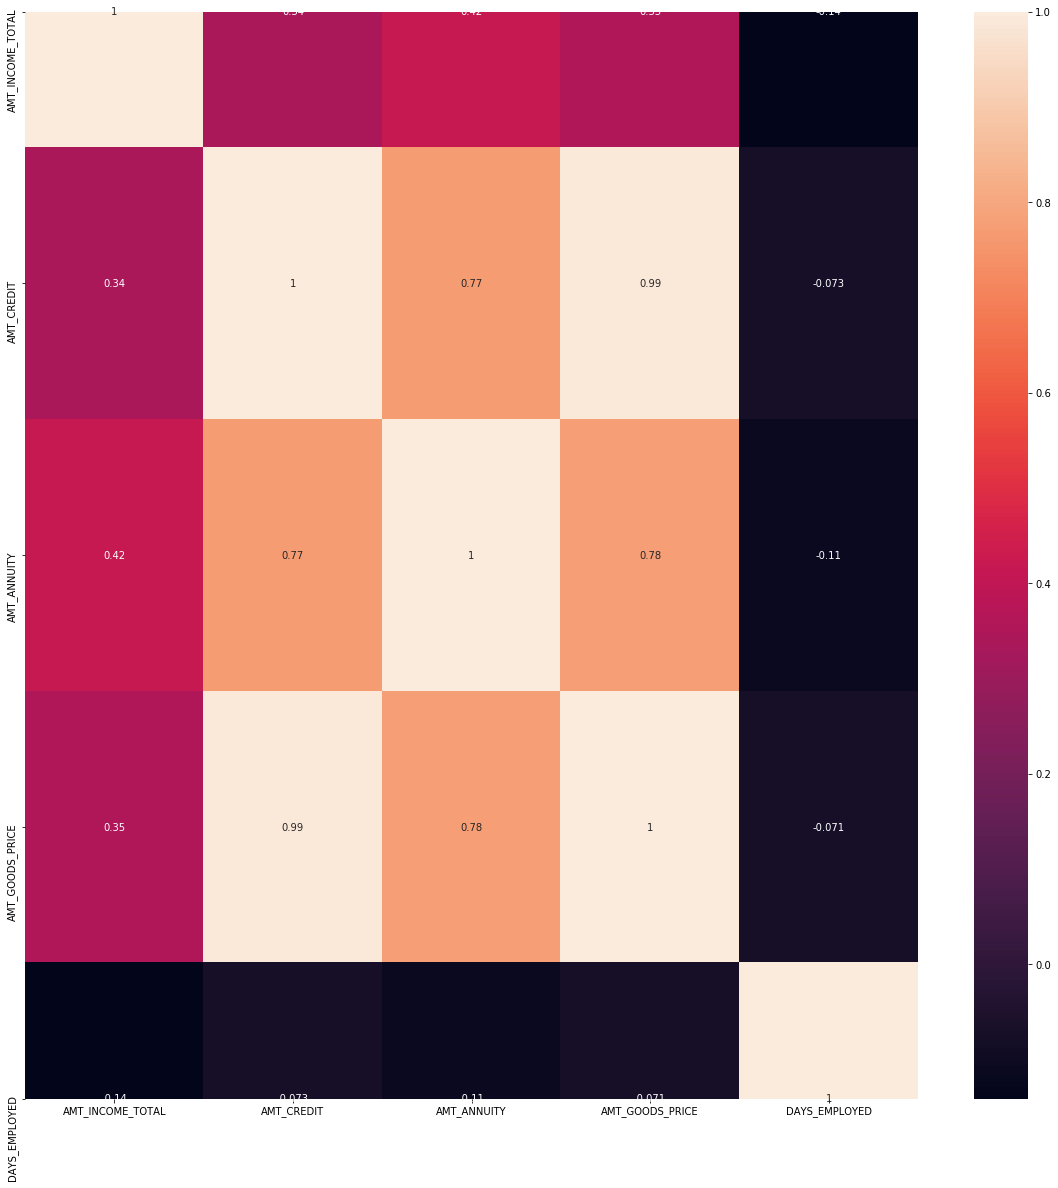

In [77]:
corr_matrix=bit0.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix,annot=True)
# plot for correlation for target0

In [78]:
corrt0= corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
#removing the correlation of same values if it multiple  for target0

In [79]:
corrt0=corrt0.unstack().reset_index()
#resetting the index for target0

In [80]:
corrt0.columns=['Var1', 'Var2','Correlation']
corrt0.head()
#changing the column names for taget0

,Var1,Var2,Correlation
0,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL,NaN
1,AMT_INCOME_TOTAL,AMT_CREDIT,NaN
2,AMT_INCOME_TOTAL,AMT_ANNUITY,NaN
3,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,NaN
4,AMT_INCOME_TOTAL,DAYS_EMPLOYED,NaN


In [81]:
corrt0.dropna(subset=['Correlation'], inplace=True)
# removing the NAN values for target0

In [82]:
corrt0.Correlation=abs(corrt0.Correlation)
corrt0.sort_values('Correlation', ascending=False)
#sorted values of correlation target0 where the values are sorted in descending order 

,Var1,Var2,Correlation
16,AMT_GOODS_PRICE,AMT_CREDIT,0.987239
17,AMT_GOODS_PRICE,AMT_ANNUITY,0.776845
11,AMT_ANNUITY,AMT_CREDIT,0.771315
10,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418959
15,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349691
5,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
20,DAYS_EMPLOYED,AMT_INCOME_TOTAL,0.141250
22,DAYS_EMPLOYED,AMT_ANNUITY,0.106425
21,DAYS_EMPLOYED,AMT_CREDIT,0.072515
23,DAYS_EMPLOYED,AMT_GOODS_PRICE,0.070881


In [ ]:
# the target 1 and target 0 correlation is almost similar after the analysis